In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# Load PCA-reduced dataset
df = pd.read_csv(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\encoded_cleaned_combined_data.csv")
X = df.drop("Target", axis=1)
y = df["Target"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


### KNN

KNN Best Params: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.8817204301075269
Precision: 0.8994702719797597
Recall: 0.8817204301075269
F1 Score: 0.8751933796846341

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        47
           1       0.94      1.00      0.97        48
           2       0.79      1.00      0.88        57
           3       0.88      0.88      0.88        34

    accuracy                           0.88       186
   macro avg       0.90      0.87      0.87       186
weighted avg       0.90      0.88      0.88       186



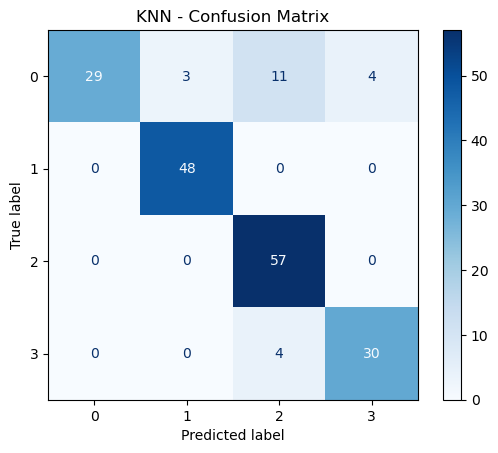

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Get best model
best_knn = grid_knn.best_estimator_

# Predict and evaluate
y_pred_knn = best_knn.predict(X_test)
print("KNN Best Params:", grid_knn.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap="Blues")
plt.title("KNN - Confusion Matrix")
plt.show()

# Save the best model
with open(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\modelswithoutpca\knn_best.pkl", "wb") as f:
    pickle.dump(best_knn, f)


### SVM

SVM Best Params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.9408602150537635
Precision: 0.9422754075615679
Recall: 0.9408602150537635
F1 Score: 0.9409881217330502

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        47
           1       1.00      1.00      1.00        48
           2       0.93      0.93      0.93        57
           3       0.97      0.88      0.92        34

    accuracy                           0.94       186
   macro avg       0.94      0.94      0.94       186
weighted avg       0.94      0.94      0.94       186



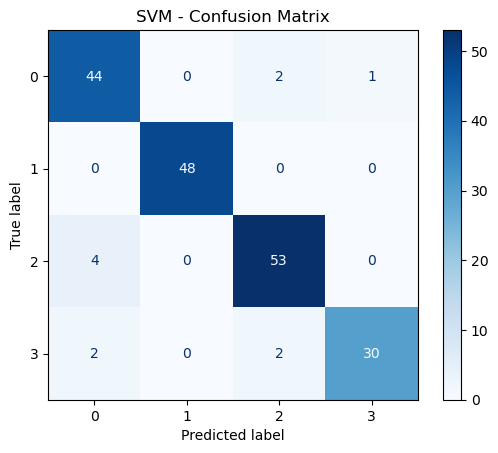

In [14]:
from sklearn.svm import SVC

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV
grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

# Get best model
best_svm = grid_svm.best_estimator_

# Predict and evaluate
y_pred_svm = best_svm.predict(X_test)
print("SVM Best Params:", grid_svm.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, cmap="Blues")
plt.title("SVM - Confusion Matrix")
plt.show()

# Save the best model
with open(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\modelswithoutpca\svm_best.pkl", "wb") as f:
    pickle.dump(best_svm, f)

### RANDOM FOREST

RF Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.9301075268817204
Precision: 0.9327828981054788
Recall: 0.9301075268817204
F1 Score: 0.9292672212280957

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.87        47
           1       1.00      1.00      1.00        48
           2       0.87      0.96      0.92        57
           3       0.91      0.94      0.93        34

    accuracy                           0.93       186
   macro avg       0.93      0.93      0.93       186
weighted avg       0.93      0.93      0.93       186



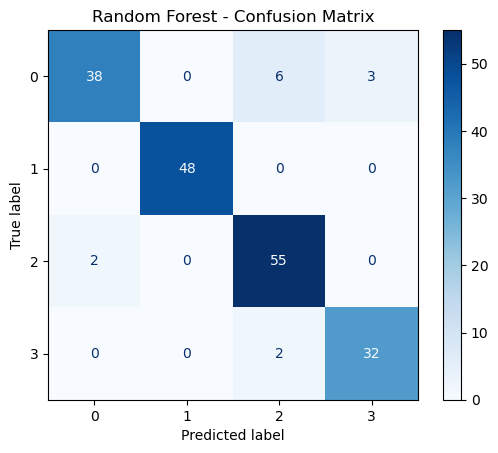

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
import pickle
import matplotlib.pyplot as plt

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Get best model
best_rf = grid_rf.best_estimator_

# Predict and evaluate
y_pred_rf = best_rf.predict(X_test)
print("RF Best Params:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# Save the best model
with open(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\modelswithoutpca\rf_best.pkl", "wb") as f:
    pickle.dump(best_rf, f)


### XGBoost

XGBoost Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Accuracy: 0.9408602150537635
Precision: 0.9425863044708547
Recall: 0.9408602150537635
F1 Score: 0.9395608922861426

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.87        47
           1       1.00      1.00      1.00        48
           2       0.92      0.96      0.94        57
           3       0.89      1.00      0.94        34

    accuracy                           0.94       186
   macro avg       0.94      0.94      0.94       186
weighted avg       0.94      0.94      0.94       186



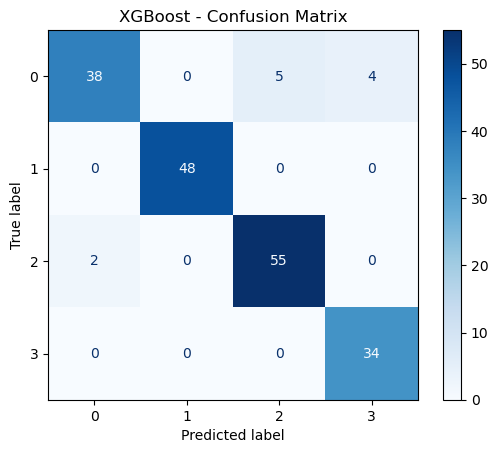

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

# Define parameter distribution for RandomizedSearchCV (smaller search space for faster computation)
param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(XGBClassifier(random_state=42), param_distributions=param_dist_xgb, 
                                       n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)

# Get best model
best_xgb = random_search_xgb.best_estimator_

# Predict and evaluate
y_pred_xgb = best_xgb.predict(X_test)

print("XGBoost Best Params:", random_search_xgb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_xgb, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap="Blues")
plt.title("XGBoost - Confusion Matrix")
plt.show()

# Save the best model
with open(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\modelswithoutpca\xgb_best.pkl", "wb") as f:
    pickle.dump(best_xgb, f)


### ENSEMBLE

Ensemble Model (Voting Classifier) Performance:
Accuracy: 0.956989247311828
Precision: 0.9572403458680112
Recall: 0.956989247311828
F1 Score: 0.9569167029388531

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        47
           1       1.00      1.00      1.00        48
           2       0.93      0.96      0.95        57
           3       0.94      0.94      0.94        34

    accuracy                           0.96       186
   macro avg       0.96      0.96      0.96       186
weighted avg       0.96      0.96      0.96       186



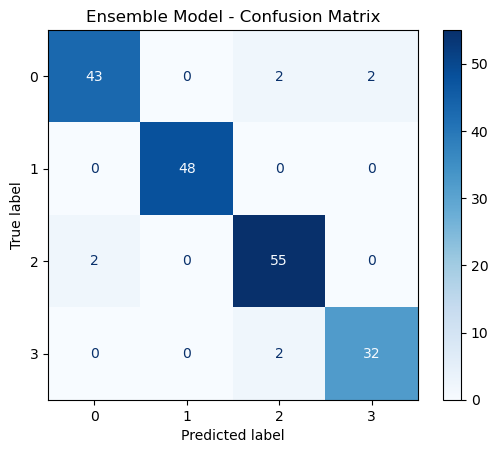

In [46]:
import pickle
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the previously trained models (assuming you saved them)
with open(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\modelswithoutpca\svm_best.pkl", "rb") as f:
    svm_best = pickle.load(f)

with open(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\modelswithoutpca\rf_best.pkl", "rb") as f:
    rf_best = pickle.load(f)

with open(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\modelswithoutpca\knn_best.pkl", "rb") as f:
    knn_best = pickle.load(f)

# Load the pre-trained XGBoost model (assuming it's saved as xgb_best.pkl)
with open(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\modelswithoutpca\xgb_best.pkl", "rb") as f:
    xgb_best = pickle.load(f)

# Create an ensemble of models using VotingClassifier (soft voting)
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_best),
    ('rf', rf_best),
    ('knn', knn_best),
    ('xgb', xgb_best)  
], voting='soft', weights=[3, 2, 1, 2])  # Adjust weights based on model performance

# Train the ensemble model (assuming you have X_train and y_train ready)
ensemble_model.fit(X_train, y_train)

# Predict and evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Print evaluation metrics
print("Ensemble Model (Voting Classifier) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Precision:", precision_score(y_test, y_pred_ensemble, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_ensemble, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_ensemble, average='weighted'))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ensemble, cmap="Blues")
plt.title("Ensemble Model - Confusion Matrix")
plt.show()

# Save the ensemble model to a .pkl file
with open(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\modelswithoutpca\ensemble_model.pkl", "wb") as f:
    pickle.dump(ensemble_model, f)
